In [8]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [118]:
corr = np.eye(3)
corr[1,2] = 1.
corr[2,1] = 1.
corr[1,0] = 0.
corr[0,1] = 0.
corr[2,0] = 0.
corr[0,2] = 0.
errs = np.array([2, 3, 4])

cov = np.zeros(shape=corr.shape)
for i in range(3) :
    for j in range(3) :
        cov[i, j] = corr[i, j] * errs[i] * errs[j]

x = np.random.multivariate_normal([4, 8, 12], cov, 100000)

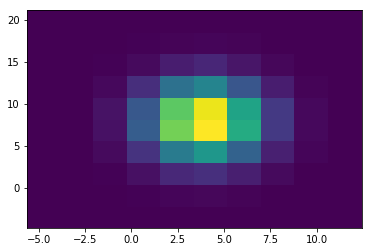

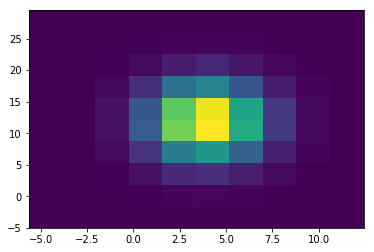

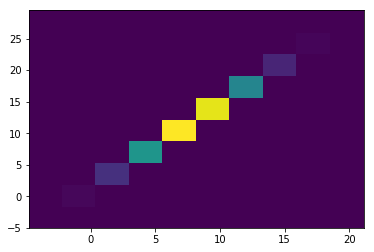

In [119]:
plt.hist2d(x[:,0], x[:,1])
plt.show()
plt.hist2d(x[:,0], x[:,2])
plt.show()
plt.hist2d(x[:,1], x[:,2])
plt.show()

In [120]:
def get_cov (x) :
    return np.cov(x.transpose())

In [127]:
def whiten (x) :
    x_norm = x
    for i in range(x.shape[1]) :
        x_mean = np.mean(x_norm [:,i])
        x_std  = np.std (x_norm [:,i])
        x_norm [:,i] = (x_norm [:,i] - x_mean) / x_std
    data_cov = get_cov(x_norm)
    eigenvalues, eigenvectors = np.linalg.eig(data_cov)
    print(eigenvectors)
    new_data = np.array([np.matmul(eigenvectors, xp) for xp in x])
    print(x[:10,:])
    print(new_data[:10,:])
    return new_data

In [128]:
x2 = whiten(x)

[[ 9.99994745e-01  3.24177981e-03 -1.01799002e-18]
 [ 2.29228449e-03 -7.07103066e-01 -7.07106781e-01]
 [ 2.29228449e-03 -7.07103066e-01  7.07106781e-01]]
[[-0.76300744  0.22673573  0.22673573]
 [ 1.03020771  0.47715629  0.47715629]
 [ 0.32071897  0.9922808   0.9922808 ]
 [-0.16187441 -0.01716953 -0.01716953]
 [ 0.81442969 -0.50905621 -0.50905621]
 [-1.67119538  0.7430527   0.7430527 ]
 [-0.70274418 -0.2944743  -0.2944743 ]
 [-1.47440174 -0.66864056 -0.66864056]
 [-0.89256541 -0.4673619  -0.4673619 ]
 [ 0.33777167 -0.45442767 -0.45442767]]
[[-7.62268399e-01 -3.22400929e-01 -1.74818766e-03]
 [ 1.03174913e+00 -6.72437598e-01  2.36330205e-03]
 [ 3.23934044e-01 -1.40255810e+00  7.38865997e-04]
 [-1.61929220e-01  2.39102573e-02 -3.71125996e-04]
 [ 8.12775160e-01  7.21779215e-01  1.86501312e-03]
 [-1.66877778e+00 -1.05466330e+00 -3.82809439e-03]
 [-7.03695104e-01  4.14837570e-01 -1.61198371e-03]
 [-1.47656157e+00  9.42218321e-01 -3.38223260e-03]
 [-8.94075807e-01  6.58901787e-01 -2.04775036e-

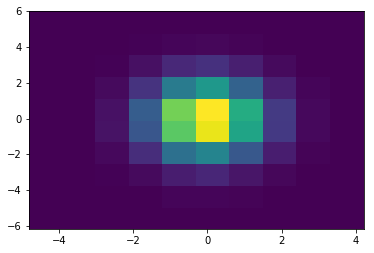

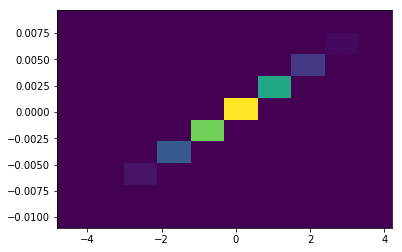

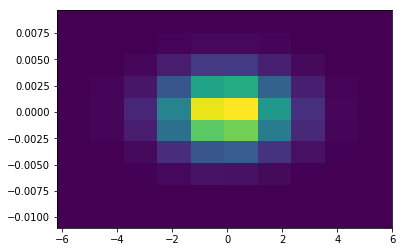

In [129]:
plt.hist2d(x2[:,0], x2[:,1])
plt.show()
plt.hist2d(x2[:,0], x2[:,2])
plt.show()
plt.hist2d(x2[:,1], x2[:,2])
plt.show()